In [1]:
#Load packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import export_graphviz
import statsmodels.api as sm
from subprocess import call
from IPython.display import Image
from matplotlib import pyplot as plt
from matplotlib.pyplot import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes

In [2]:
#Suppress deprecation warnings..
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
#Read data
data = pd.read_csv('StateData.csv')
data.head()

,Population,Income,Illiteracy,LifeExp,Murder,HighSchoolGrad,Frost,Area,Longitude,Latitude,Region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,-86.7509,32.5901,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,-127.2500,49.2500,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,-111.6250,34.2192,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,-92.2992,34.7336,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,-119.7730,36.5341,West


In [4]:
#Get targets and features
target = data.LifeExp
features = data.drop(['LifeExp','Longitude','Latitude','Region'],axis=1)

In [5]:
#Choose models
dtree = DecisionTreeRegressor()
lass = Lasso()

#Choose set of hyperparams
params1 = {'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]}
params2 = {'alpha':[0.001,0.01,0.1,1,10]}

#Lists to store R-squared
tree_score = []
lasso_score = []

#Kfold
kf = KFold(10,random_state=21,shuffle=True)

#Loop over each fold
for train_index, test_index in kf.split(features):
    
    #Get the training and testing sets
    X_train, X_test = features.loc[train_index], features.loc[test_index]
    y_train, y_test = target[train_index], target[test_index]
    
    #Train/test CART
    clf = GridSearchCV(dtree, params1, cv=10)
    clf.fit(X_train,y_train)
    tree_score.append(clf.best_estimator_.score(X_test,y_test))
    
    #Train/test Lasso
    clf_lass = GridSearchCV(lass, params2, cv=10)
    clf_lass.fit(X_train,y_train)
    lasso_score.append(clf_lass.best_estimator_.score(X_test,y_test))
    
#Print average R-squared
print('CART average R-squared:', np.mean(tree_score))
print('Lasso average R-squared:', np.mean(lasso_score))
#The R-squared keeps changing with different seeds (even with cross validation).

CART average R-squared: -0.17150529802408726
Lasso average R-squared: -0.15168249361018935


In [6]:
#Storage
tree_score = []
lasso_score = []

#Models
dtree = DecisionTreeRegressor()
lass = Lasso()

#Hyper-parameters
params1 = {'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]}
params2 = {'alpha':[0.001,0.01,0.1,1,10]}

#Kfold loop
kf = KFold(3,random_state=21,shuffle=True)
for train_index, test_index in kf.split(features):
    #Split data
    X_train, X_test = features.loc[train_index], features.loc[test_index]
    y_train, y_test = target[train_index], target[test_index]
    #CART
    clf = GridSearchCV(dtree, params1, cv=3)
    clf.fit(X_train,y_train)
    tree_score.append(clf.best_estimator_.score(X_test,y_test))
    #LASSO
    clf_lass = GridSearchCV(lass, params2, cv=3)
    clf_lass.fit(X_train,y_train)
    lasso_score.append(clf_lass.best_estimator_.score(X_test,y_test))
    
#Print results
print('CART average R-squared:', np.mean(tree_score))
print('Lasso average R-squared:', np.mean(lasso_score))
#Seems to help a bit (still lots of variability but better performance). Data is small so ten fold CV creates 
#very small sets (i.e., test set of 5). Due to the randomness and differences between observations
#the model appears very sensitive to the small traiing, testing, validation sets.

CART average R-squared: 0.2736407065668388
Lasso average R-squared: 0.3189129265043138


In [7]:
#Storage
tree_score = []
lasso_score = []

#Models
dtree = DecisionTreeRegressor()
lass = Lasso()

#Hyper-parameters
params1 = {'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]}
params2 = {'alpha':[0.001,0.01,0.1,1,10]}

#Repetitions
reps = range(25)
for rep in reps:
    
    #Kfold loop
    kf = KFold(3,random_state=rep*10,shuffle=True)
    for train_index, test_index in kf.split(features):
        #Split dat
        X_train, X_test = features.loc[train_index], features.loc[test_index]
        y_train, y_test = target[train_index], target[test_index]
        #CART
        clf = GridSearchCV(dtree, params1, cv=3)
        clf.fit(X_train,y_train)
        tree_score.append(clf.best_estimator_.score(X_test,y_test))
        #LASSO
        clf_lass = GridSearchCV(lass, params2, cv=3)
        clf_lass.fit(X_train,y_train)
        lasso_score.append(clf_lass.best_estimator_.score(X_test,y_test))
        
#Print results
print('CART average R-squared:', np.mean(tree_score))
print('Lasso average R-squared:', np.mean(lasso_score))

CART average R-squared: 0.23121439667831314
Lasso average R-squared: 0.36587467625001674


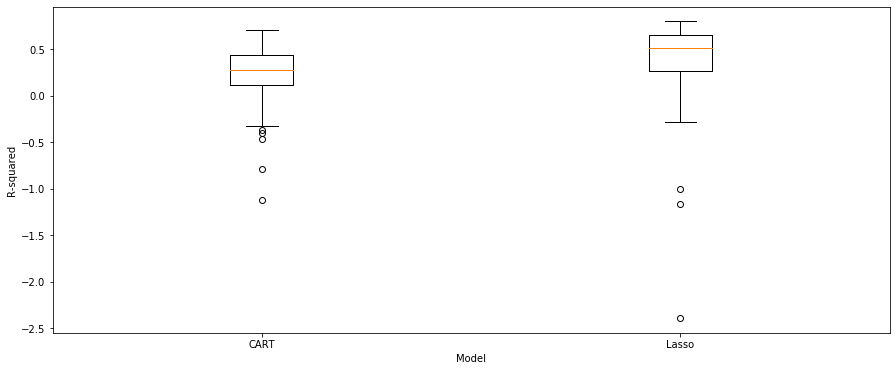

In [8]:
fig = figure(figsize=(15, 6))
plt.boxplot([tree_score,lasso_score])
plt.xlabel('Model')
locs,junk = plt.xticks()
plt.xticks(locs,['CART','Lasso'])
plt.ylabel('R-squared')
plt.show()
#Lasso seems to perform the best

In [ ]:
#Results are still concerning due to the large range in R-squared (Model sometimes performs really bad).

In [16]:
#Storage
tree_score = []
lasso_score = []
ada_score = []
RF_score = []

#Models
dtree = DecisionTreeRegressor()
lass = Lasso()
ada = AdaBoostRegressor()
RF = RandomForestRegressor()

#Hyperparameters
params1 = {'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]}
params2 = {'alpha':[0.001,0.01,0.1,1,10]}
params3 = {'learning_rate':[0.001,0.01,0.1,1]}
params4 = {'n_estimators':[10,100,250,500,1000]}

#Repetitions
reps = range(25)
for rep in reps:
    
    #Kfold loop
    kf = KFold(3,random_state=rep,shuffle=True)
    for train_index, test_index in kf.split(features):
        #Split data
        X_train, X_test = features.loc[train_index], features.loc[test_index]
        y_train, y_test = target[train_index], target[test_index]
        #CART
        clf = GridSearchCV(dtree, params1, cv=3)
        clf.fit(X_train,y_train)
        tree_score.append(clf.best_estimator_.score(X_test,y_test))
        #LASSO
        clf_lass = GridSearchCV(lass, params2, cv=3)
        clf_lass.fit(X_train,y_train)
        lasso_score.append(clf_lass.best_estimator_.score(X_test,y_test))
        #ADABOOST
        clf_ada = GridSearchCV(ada, params3, cv=3)
        clf_ada.fit(X_train,y_train)
        ada_score.append(clf_ada.best_estimator_.score(X_test,y_test))
        #RANDOM FOREST
        clf_RF = GridSearchCV(RF, params4, cv=3)
        clf_RF.fit(X_train,y_train)
        RF_score.append(clf_RF.best_estimator_.score(X_test,y_test))
        
#Print results
print('CART average R-squared:', np.mean(tree_score))
print('Lasso average R-squared:', np.mean(lasso_score))
print('Ada average R-squared:', np.mean(ada_score))
print('RF average R-squared:', np.mean(RF_score))
#CART is the best!

CART average R-squared: 0.19289481937927236
Lasso average R-squared: 0.4417468375587395
Ada average R-squared: 0.3980069082571023
RF average R-squared: 0.44460985070677256


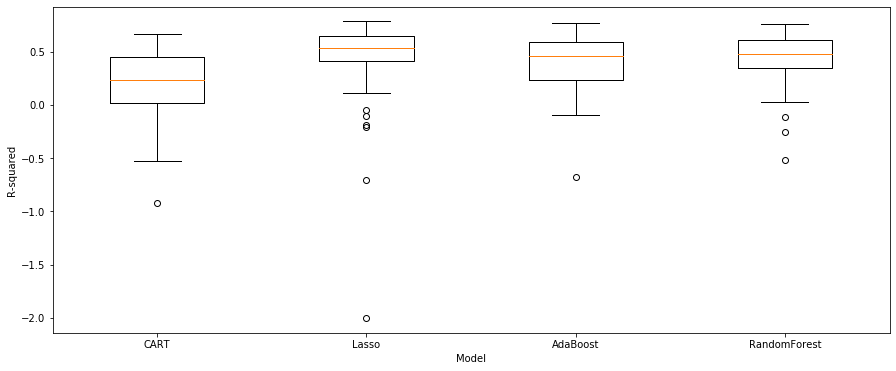

In [17]:
fig = figure(figsize=(15, 6))
plt.boxplot([tree_score,lasso_score,ada_score,RF_score])
plt.xlabel('Model')
locs,junk = plt.xticks()
plt.xticks(locs,['CART','Lasso','AdaBoost','RandomForest'])
plt.ylabel('R-squared')
plt.show()
#RF and Lasso are comparable

In [ ]:
#Still high variation, even with RF. Small data and highly influential examples is likely the cause! 